# Project 1: Facial Emotion Recognition

In [ ]:
!git clone https://github.com/misbah4064/facial_expressions.git

Cloning into 'facial_expressions'...
remote: Enumerating objects: 14243, done.
remote: Total 14243 (delta 0), reused 0 (delta 0), pack-reused 14243
Receiving objects: 100% (14243/14243), 240.06 MiB | 35.76 MiB/s, done.
Resolving deltas: 100% (232/232), done.
Checking out files: 100% (14004/14004), done.


In [ ]:
%cd facial_expressions/
%mkdir -p data_set/{anger,happy,neutral,sad,surprise}

/content/facial_expressions


In [ ]:
%mkdir -p data_set_test/{anger,happy,neutral,sad,surprise}

In [ ]:
import cv2
with open('happy.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/happy/"+image,loadedImage)
print("done writing")

done writing


In [ ]:
import cv2
with open('anger.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/anger/"+image,loadedImage)
print("done writing")

done writing


In [ ]:
import cv2
with open('neutral.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/neutral/"+image,loadedImage)
print("done writing")

done writing


In [ ]:
import cv2
with open('sad.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/sad/"+image,loadedImage)
print("done writing")

done writing


In [ ]:
import cv2
with open('surprise.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("images/"+image)
    cv2.imwrite("data_set/surprise/"+image,loadedImage)
print("done writing")

done writing


In [ ]:
%mkdir dataset

# **Step 1 :

In [ ]:
import cv2

with open('happy.txt','r') as f: 
    images = [line.strip() for line in f] 
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:

face_id = input('\n Enter Emotion id end press <return> ==>  ')


count = 0

for image in images:
    img = cv2.imread("data_set/happy/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5) 

    for (x,y,w,h) in faces: 

        
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)  
        count += 1

        
        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

print("\n Done creating face data")


 Enter Emotion id end press <return> ==>  1

 Done creating face data


In [ ]:
%mkdir trainer

# **Step 2:

In [ ]:
import cv2
import numpy as np
from PIL import Image
import os


path = 'dataset' 

recognizer = cv2.face.LBPHFaceRecognizer_create() 
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");


def getImagesAndLabels(path):

    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []

    for imagePath in imagePaths: 

        PIL_img = Image.open(imagePath).convert('L') 
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)

    return faceSamples,ids

print ("\n [INFO] Training faces....")
faces,ids = getImagesAndLabels(path) 
recognizer.train(faces, np.array(ids))

recognizer.write('trainer.yml') 


print("\n [INFO] {0} Emotions trained. Exiting Program".format(len(np.unique(ids))))



 [INFO] Training faces....

 [INFO] 1 Emotions trained. Exiting Program


# **Step 3 

In [ ]:
import cv2
import numpy as np
import os 

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer.yml')  
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX


id = 0

names = ['Happy', 'Anger', 'Neutral', 'Sad', 'Surprise'] 

cam = cv2.VideoCapture(0) 
cam.set(3, 640) 
cam.set(4, 480)

minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)

img = cv2.imread("dwayne_johnson.jpg")


gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale( 
    gray,
    scaleFactor = 1.2,
    minNeighbors = 5,
    minSize = (int(minW), int(minH)),
    )

for(x,y,w,h) in faces:

    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

    id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

    
    if (confidence < 100):
        id = names[id]
        confidence = "  {0}%".format(round(100 - confidence))
    else:
        id = "unknown"
        confidence = "  {0}%".format(round(100 - confidence))
    
    cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
    cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)  

cv2.imwrite("dwayne_johnson.jpg",img) 

print("\n [INFO] Done detecting and Image is saved")
cam.release()
cv2.destroyAllWindows()


 [INFO] Done detecting and Image is saved


# **Display 

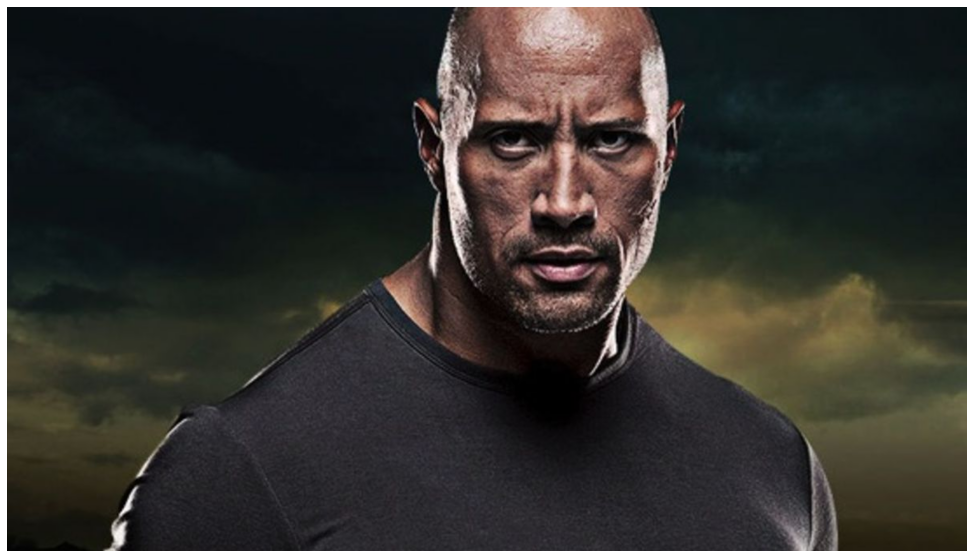

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("dwayne.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

# Question: Do the Face Emotion Detection with Deep Learning

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import load_model
from keras.preprocessing import image

In [ ]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#input layer 
model.add(Flatten())
#hidden layer
model.add(Dense(units=128,activation="relu"))
#output layer
model.add(Dense(units=5,activation="softmax"))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
x_train=train_datagen.flow_from_directory("/content/facial_expressions/data_set",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 1250 images belonging to 5 classes.


In [ ]:
print(x_train.class_indices)

{'anger': 0, 'happy': 1, 'neutral': 2, 'sad': 3, 'surprise': 4}


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[categorical_accuracy])

In [ ]:
#steps per epoch=279/30;validation_step=120/30
model.fit_generator(x_train,steps_per_epoch=15,epochs=5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
15/15 [==============================] - 3s 183ms/step - loss: 0.2411 - categorical_accuracy: 0.7479
Epoch 2/5
15/15 [==============================] - 3s 185ms/step - loss: 0.2464 - categorical_accuracy: 0.7396
Epoch 3/5
15/15 [==============================] - 3s 186ms/step - loss: 0.2514 - categorical_accuracy: 0.7250
Epoch 4/5
15/15 [==============================] - 3s 188ms/step - loss: 0.2474 - categorical_accuracy: 0.7444
Epoch 5/5
15/15 [==============================] - 3s 188ms/step - loss: 0.2348 - categorical_accuracy: 0.7521


In [ ]:
model.save("predict.h5")

In [ ]:
def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    return preds

In [ ]:
model = load_model('predict.h5')

In [ ]:
file_path = "/content/facial_expressions/elon.jpg"
pred = model_predict(file_path, model)
pred

array([[0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
classes = ["Anger","Happy","Neutral","Sad","Surprise"]
j=0
for i in pred[0]:
    if i==1:
        break;
    else:
        j+=1
result = classes[j]
im=Image.open('elon.jpg')

print('Predicted Emotion for :',result)


Predicted Emotion for : Happy


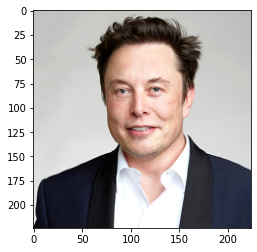

Predicted Emotion : Happy


In [ ]:
from PIL import Image
im = cv2.imread('elon.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

print('Predicted Emotion :',result)

# Project 2: Road Lane Detection

In [ ]:
import cv2
import numpy as np

In [ ]:
from google.colab.patches import cv2_imshow

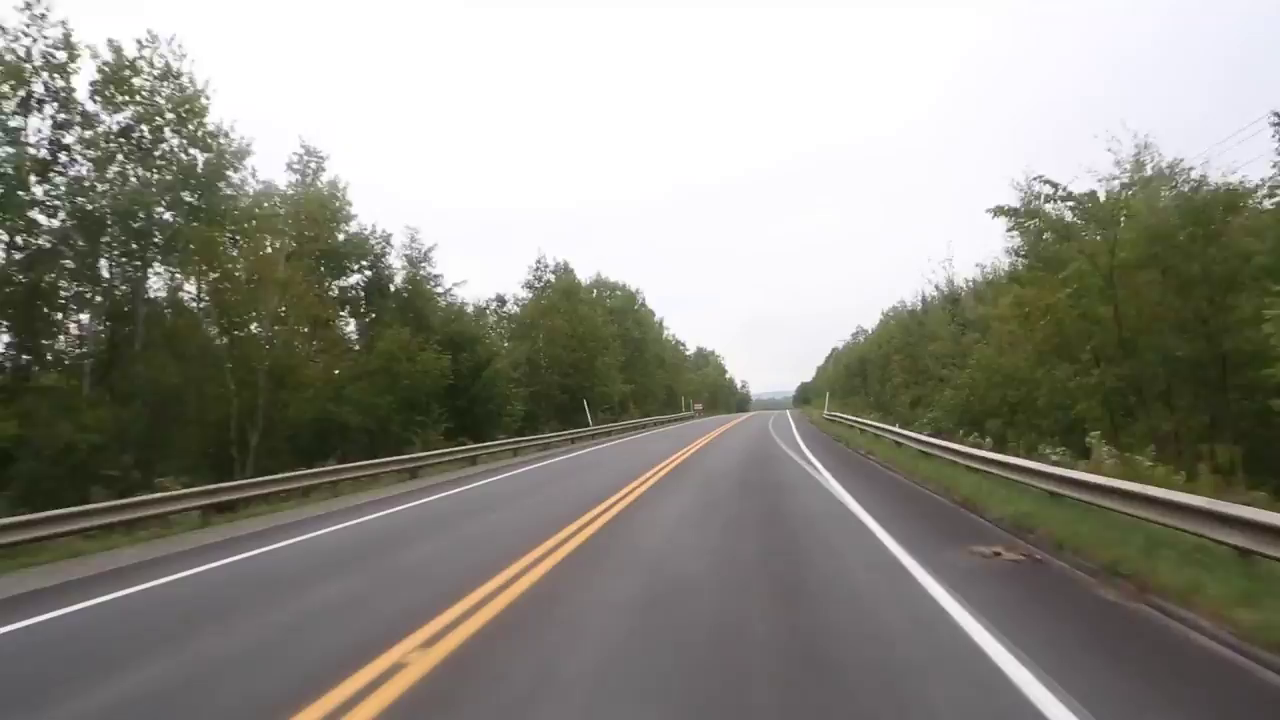

In [ ]:

capture = cv2.VideoCapture("test1.mp4")


ret, frame = capture.read()


cv2_imshow(frame)

In [ ]:
def canny(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernel = 5
    blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
    canny = cv2.Canny(blur, 50, 150) 
    return canny

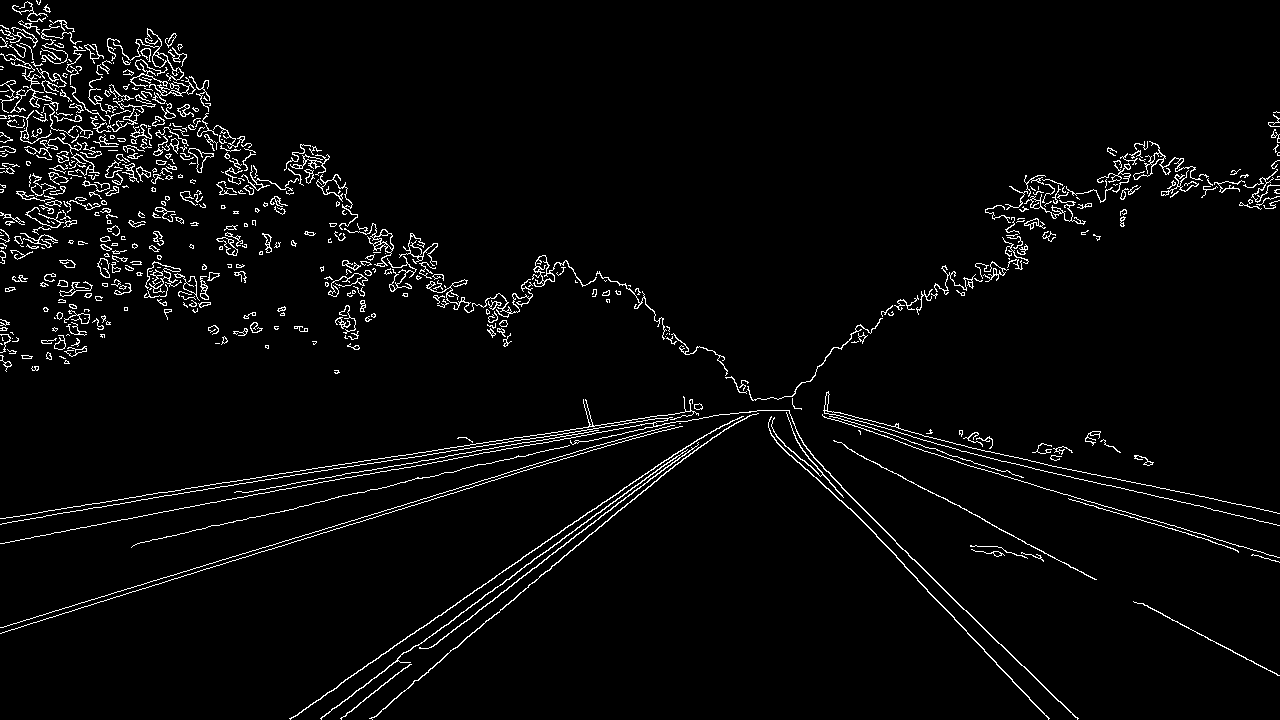

In [ ]:
canny_output = canny(frame) 
cv2_imshow(canny_output)

# Issue 1

In [ ]:
def region_of_interest(img):
    height = img.shape[0]
    width = img.shape[1]
    mask = np.zeros_like(img)
   

    triangle = np.array([[(200, height),(800, 350),(1200, height),]], np.int32)
    
    
    filled_image = cv2.fillPoly(mask, triangle, 255)
    #print("The filled image with Fillpoly ")
    #cv2_imshow(filled_image)
     
    masked_image = cv2.bitwise_and(img, mask) 
    return masked_image

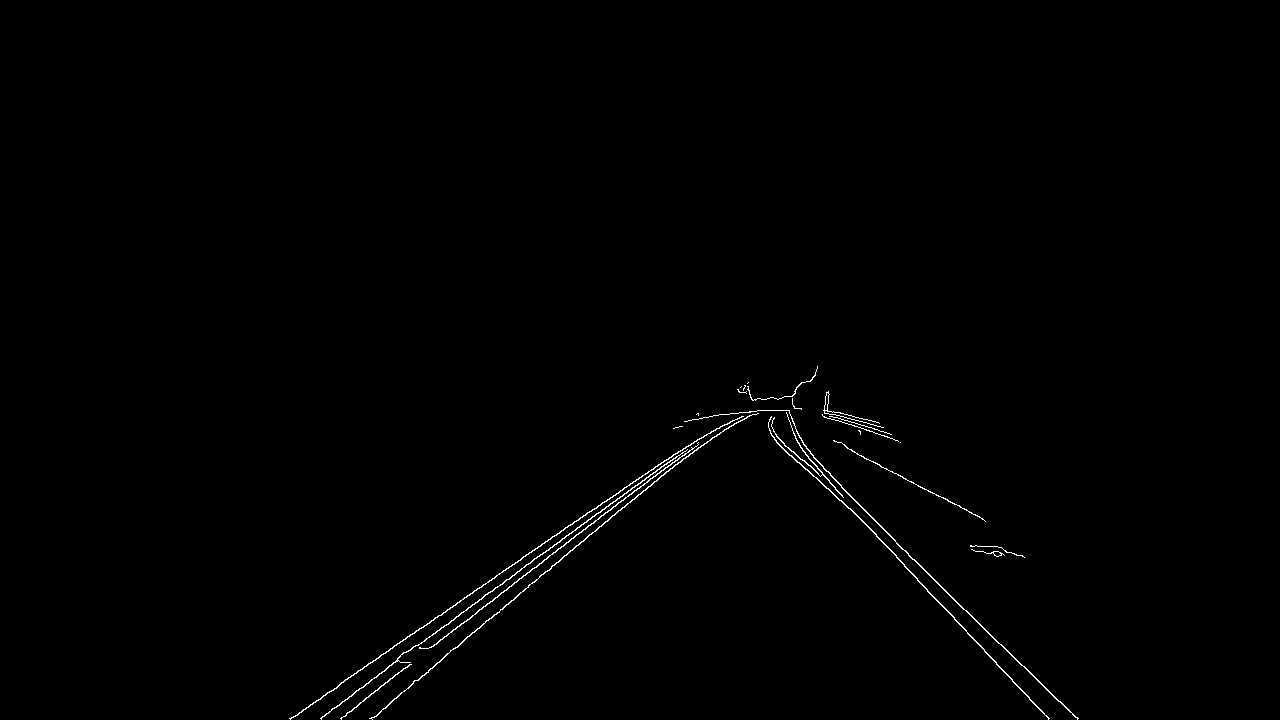

In [ ]:
canny_output = canny(frame)
masked_output = region_of_interest(canny_output)
cv2_imshow(masked_output)

# Issue 2

In [ ]:

def houghLines(img):
    houghlines = cv2.HoughLinesP(img, 2, np.pi/180, 100, np.array([]), minLineLength=40, maxLineGap=5)
    return houghlines

In [ ]:
canny_output = canny(frame)
masked_output = region_of_interest(canny_output)
lines = houghLines(masked_output)
cv2_imshow(lines) 

In [ ]:
def display_lines(img,lines): 
    line_image = np.zeros_like(img)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line: 
              
              cv2.line(img,(x1,y1),(x2,y2),(0,0,255),10) 
    return img

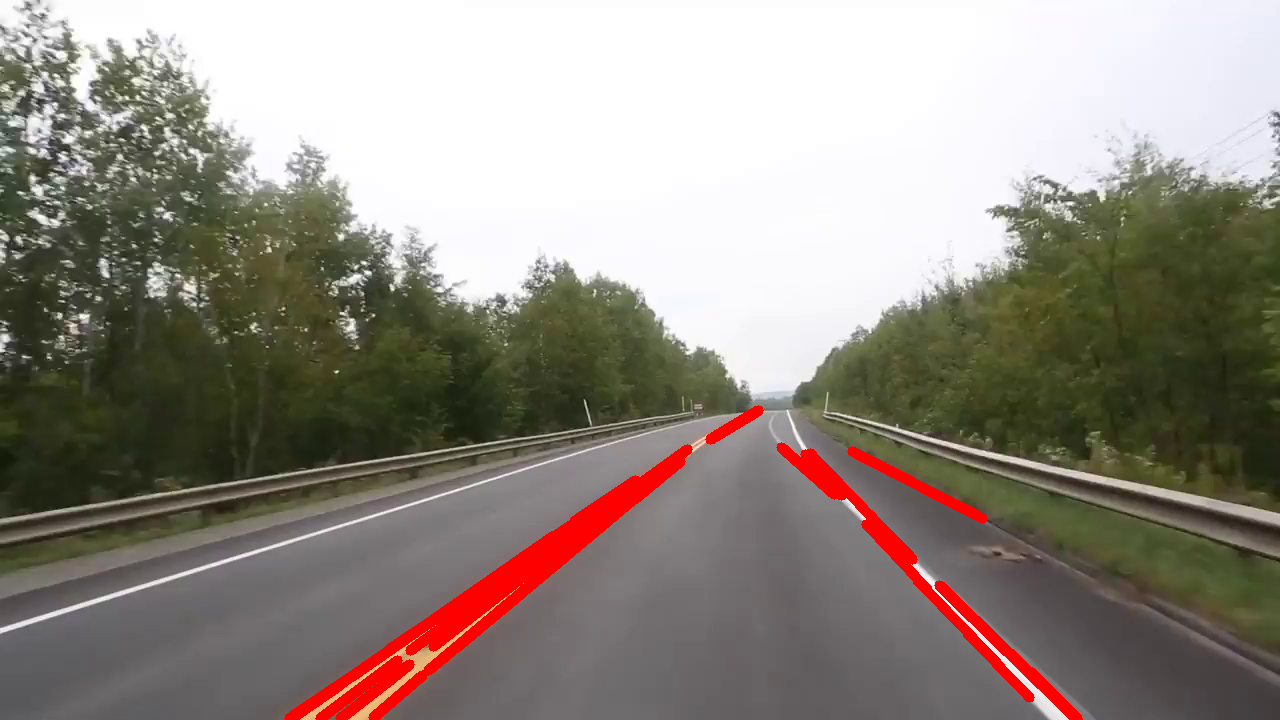

In [ ]:
canny_output = canny(frame)
masked_output = region_of_interest(canny_output)
lines = houghLines(masked_output)
line_image = display_lines(frame, lines)
cv2_imshow(line_image) 

# Issue

In [ ]:
def average_slope_intercept(img, lines):
    left_fit    = []
    right_fit   = []
    if lines is None:
        return None
    for line in lines:
        for x1, y1, x2, y2 in line:
            
            fit = np.polyfit((x1,x2), (y1,y2), 1)
           
            slope = fit[0]
            
            intercept = fit[1]
            if slope < 0: 
                left_fit.append((slope, intercept))
            else: 
                right_fit.append((slope, intercept))
    left_fit_average  = np.average(left_fit, axis=0) 
    right_fit_average = np.average(right_fit, axis=0)

  
    left_line  = make_points(img, left_fit_average)
    right_line = make_points(img, right_fit_average)
    
    averaged_lines = [left_line, right_line]
    return averaged_lines

In [ ]:
def make_points(image, line):
    slope, intercept = line
    y1 = int(image.shape[0])
    y2 = int(y1*3.0/5)  
    x1 = int((y1 - intercept)/slope) 

    
    x2 = int((y2 - intercept)/slope)
    return [[x1, y1, x2, y2]]

# Load again

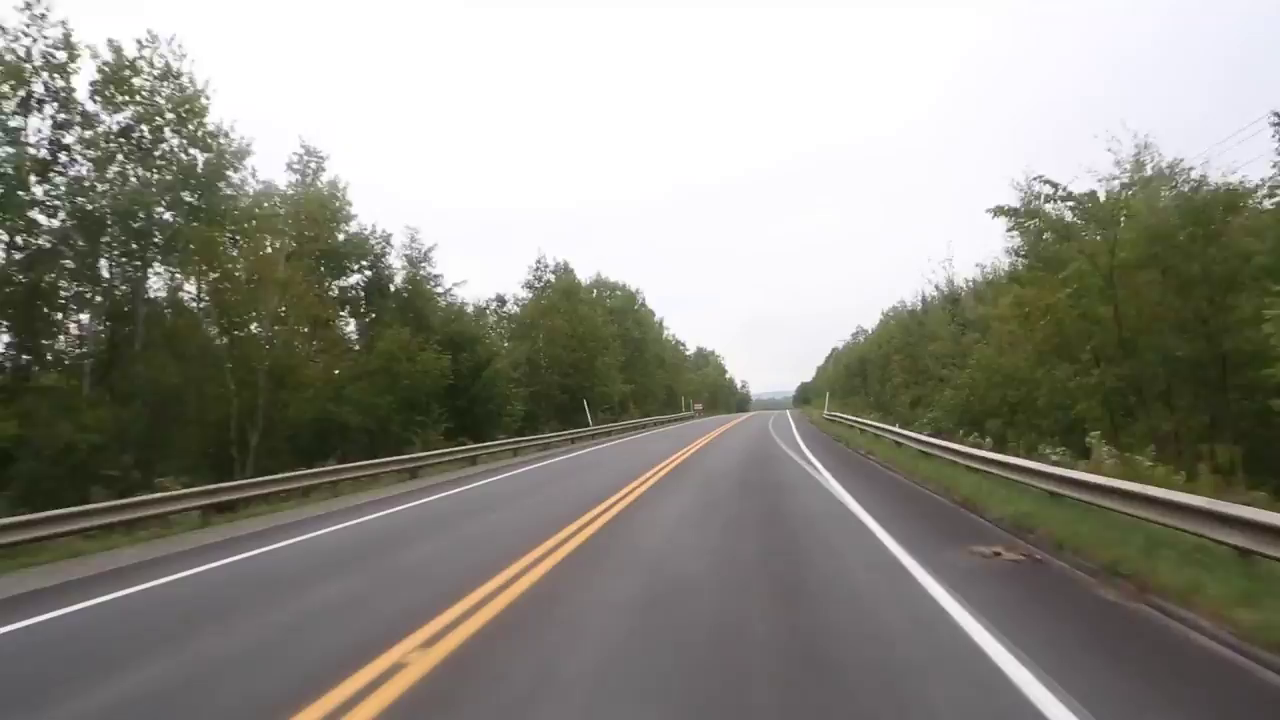

In [ ]:
capture = cv2.VideoCapture("test1.mp4")
ret, frame = capture.read()
cv2_imshow(frame)

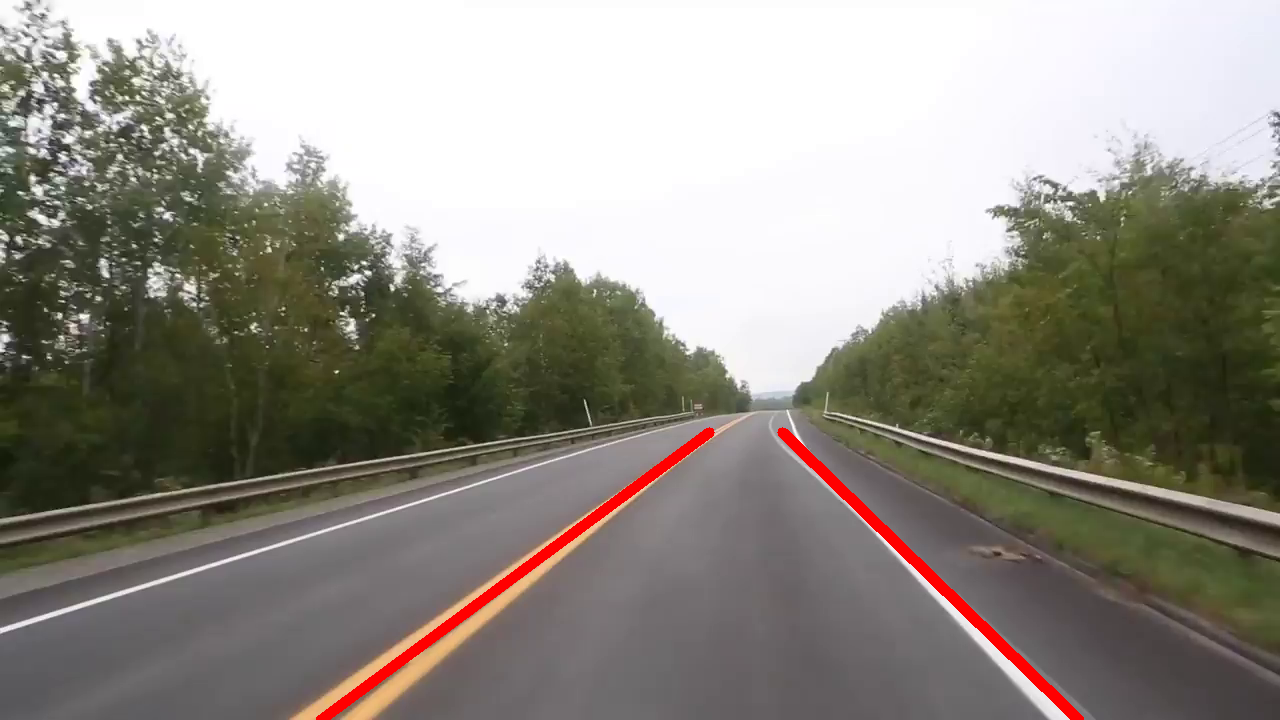

In [ ]:
canny_output = canny(frame)
masked_output = region_of_interest(canny_output)
lines = houghLines(masked_output)
average_lines = average_slope_intercept(frame,lines)
line_image = display_lines(frame, average_lines)
cv2_imshow(line_image) 

# Question 2: Generate Perceptive Transformations

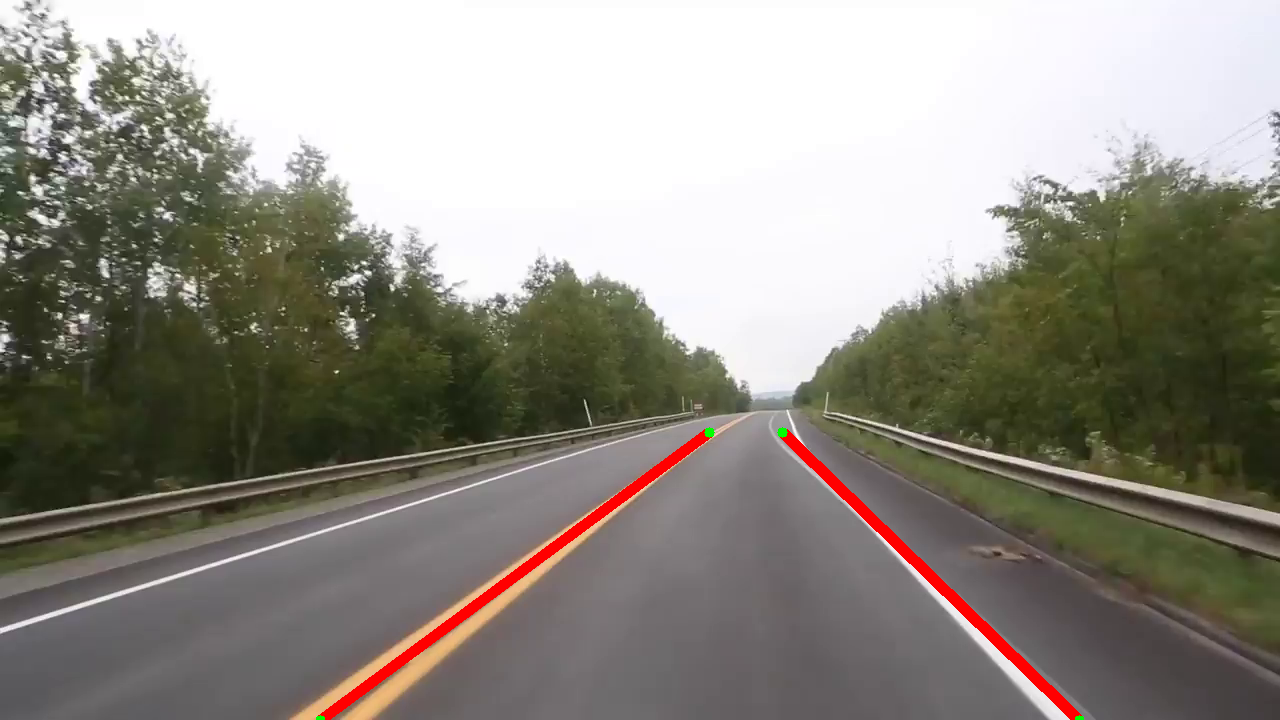

Transformed image : 


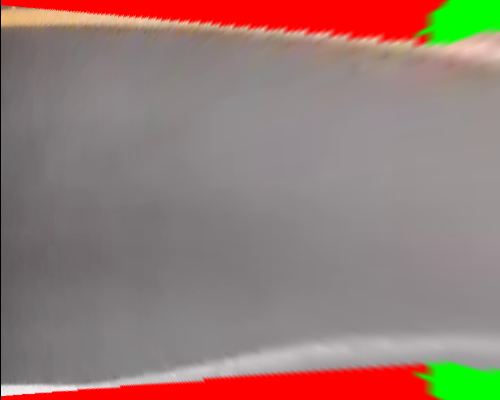

In [ ]:
import cv2
from operator import itemgetter
from glob import glob
import matplotlib.pyplot as plt

pt1 = average_lines[0]
pt2 = average_lines[1]
# Coordinates that you want to Perspective Transform
frame_test = frame 
for i in pt1:
  for j in pt2:
    pts11 = np.float32([[i[0],i[1]],[i[2],i[3]],[j[0],j[1]],[j[2],j[3]]])
# Size of the Transformed Image
pts2 = np.float32([[0,0],[500,0],[0,400],[500,400]])
for val in pts11:
    cv2.circle(frame_test,(val[0],val[1]),5,(0,255,0),-1) 
M = cv2.getPerspectiveTransform(pts11,pts2)
dst = cv2.warpPerspective(frame_test,M,(500,400))
cv2_imshow(frame_test)
print('Transformed image : ')
cv2_imshow(dst)

# Question 3: Do the same using Deep LEarning Algorithms


# Ref: https://github.com/amusi/awesome-lane-detection#2021

In [ ]:
#Road Lane Detection

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [ ]:
!git clone https://github.com/udacity/CarND-LaneLines-P1.git

Cloning into 'CarND-LaneLines-P1'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 262 (delta 1), reused 0 (delta 0), pack-reused 254
Receiving objects: 100% (262/262), 43.45 MiB | 30.94 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [ ]:
from distutils.dir_util import copy_tree
import shutil
copy_tree("./CarND-LaneLines-P1/test_images", "./test_images")
copy_tree("./CarND-LaneLines-P1/test_videos", "./test_videos")
shutil.rmtree('./CarND-LaneLines-P1', ignore_errors=False, onerror=None)

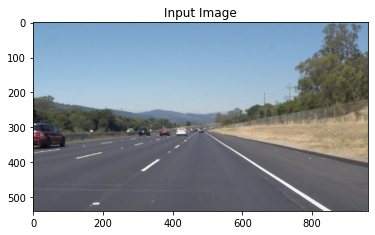

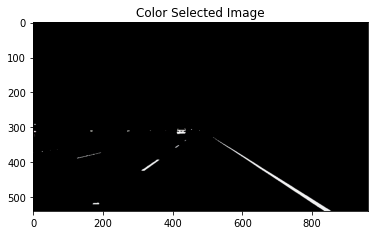

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image = mpimg.imread('test_images/solidWhiteRight.jpg')


ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

red_threshold = 200
green_threshold = 200
blue_threshold = 200


rgb_threshold = [red_threshold, green_threshold, blue_threshold]


thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(color_select)
plt.title("Color Selected Image")
plt.show()



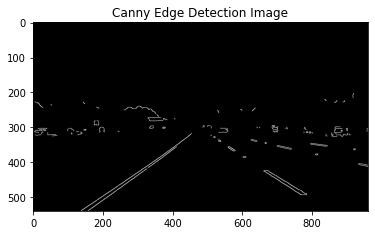

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

image = mpimg.imread('test_images/solidYellowLeft.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='Greys_r')
plt.title("Canny Edge Detection Image")
plt.show()

In [ ]:
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):

    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):

    mask = np.zeros_like(img)   

    if len(img.shape) > 2:
        channel_count = img.shape[2] 
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
           
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def slope_lines(image,lines):
    
    img = image.copy()
    poly_vertices = []
    order = [0,1,3,2]

    left_lines = [] # Like /
    right_lines = [] # Like \
    for line in lines:
        for x1,y1,x2,y2 in line:

            if x1 == x2:
                pass #Vertical Lines
            else:
                m = (y2 - y1) / (x2 - x1)
                c = y1 - m * x1

                if m < 0:
                    left_lines.append((m,c))
                elif m >= 0:
                    right_lines.append((m,c))

    left_line = np.mean(left_lines, axis=0)
    right_line = np.mean(right_lines, axis=0)


    for slope, intercept in [left_line, right_line]:

        rows, cols = image.shape[:2]
        y1= int(rows) 

        y2= int(rows*0.6)

        x1=int((y1-intercept)/slope)
        x2=int((y2-intercept)/slope)
        poly_vertices.append((x1, y1))
        poly_vertices.append((x2, y2))
        draw_lines(img, np.array([[[x1,y1,x2,y2]]]))
    
    poly_vertices = [poly_vertices[i] for i in order]
    cv2.fillPoly(img, pts = np.array([poly_vertices],'int32'), color = (0,255,0))
    return cv2.addWeighted(image,0.7,img,0.4,0.)
    


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):

    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    line_img = slope_lines(line_img,lines)
    return line_img

def weighted_img(img, initial_img, α=0.1, β=1., γ=0.):
    lines_edges = cv2.addWeighted(initial_img, α, img, β, γ)
    return lines_edges
def get_vertices(image):
    rows, cols = image.shape[:2]
    bottom_left  = [cols*0.15, rows]
    top_left     = [cols*0.45, rows*0.6]
    bottom_right = [cols*0.95, rows]
    top_right    = [cols*0.55, rows*0.6] 
    
    ver = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return ver

In [ ]:
# Lane finding Pipeline
def lane_finding_pipeline(image):
    
    #Grayscale
    gray_img = grayscale(image)
    #Gaussian Smoothing
    smoothed_img = gaussian_blur(img = gray_img, kernel_size = 5)
    #Canny Edge Detection
    canny_img = canny(img = smoothed_img, low_threshold = 180, high_threshold = 240)
    #Masked Image Within a Polygon
    masked_img = region_of_interest(img = canny_img, vertices = get_vertices(image))
    #Hough Transform Lines
    houghed_lines = hough_lines(img = masked_img, rho = 1, theta = np.pi/180, threshold = 20, min_line_len = 20, max_line_gap = 180)
    #Draw lines on edges
    output = weighted_img(img = houghed_lines, initial_img = image, α=0.8, β=1., γ=0.)
    
    return output

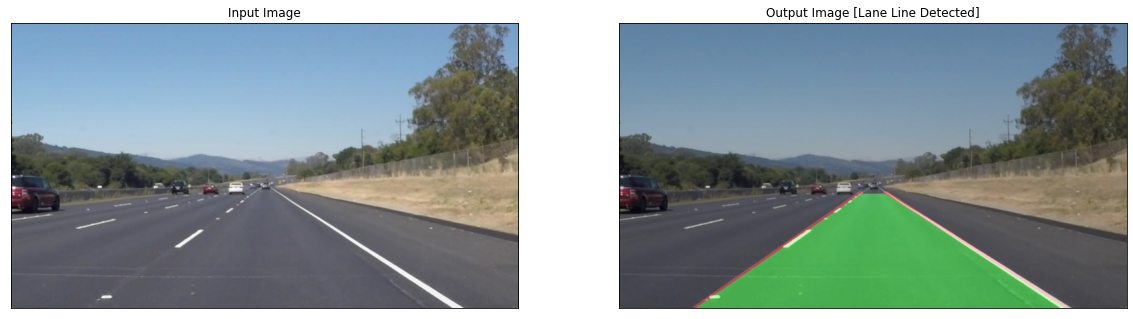

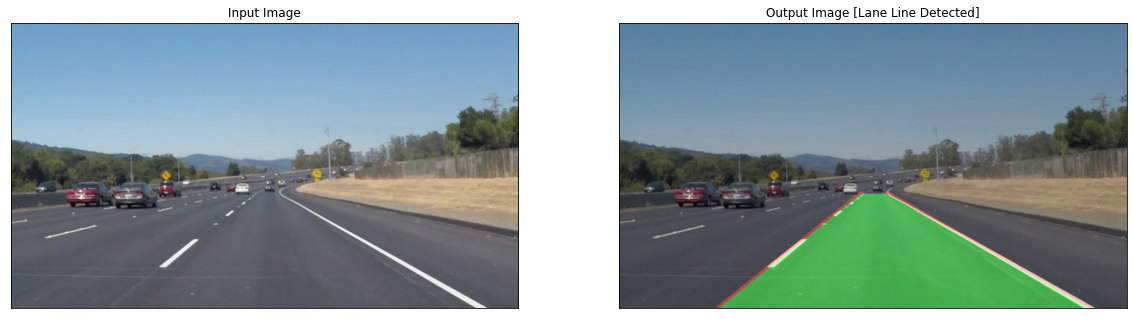

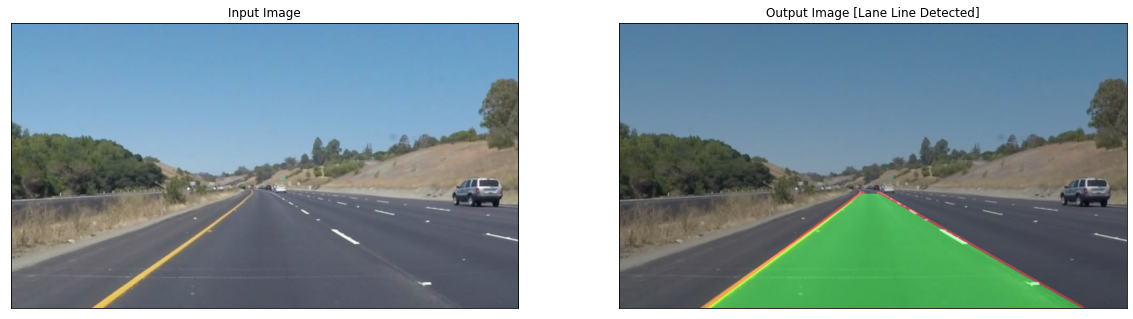

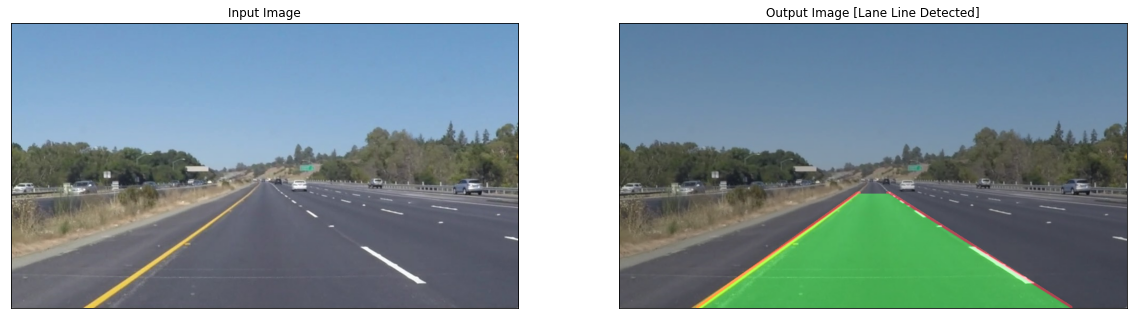

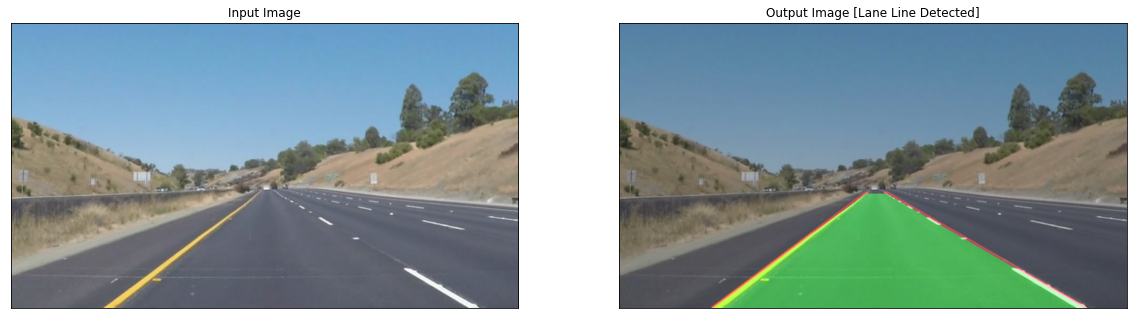

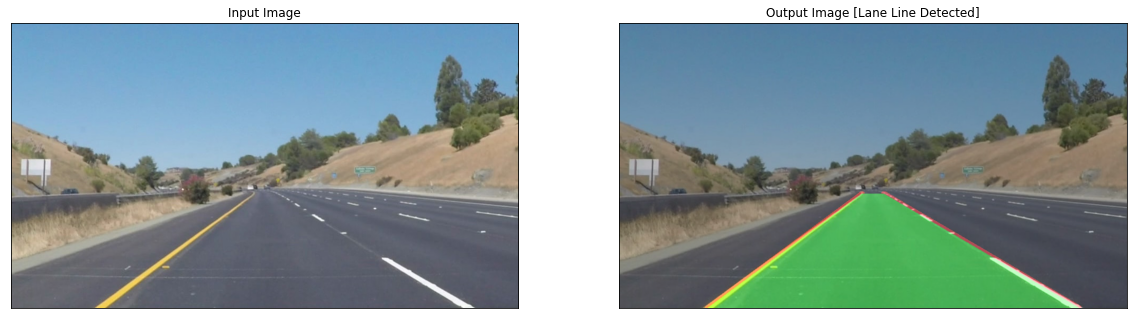

In [ ]:
for image_path in list(os.listdir('./test_images')):
    fig = plt.figure(figsize=(20, 10))
    image = mpimg.imread(f'./test_images/{image_path}')
    ax = fig.add_subplot(1, 2, 1,xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title("Input Image")
    ax = fig.add_subplot(1, 2, 2,xticks=[], yticks=[])
    plt.imshow(lane_finding_pipeline(image))
    ax.set_title("Output Image [Lane Line Detected]")
    plt.show()